In [ ]:
! pip install tensorflow==2.2-rc0

     |████████████████████████████████| 515.9MB 19kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0-rc0'

In [ ]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

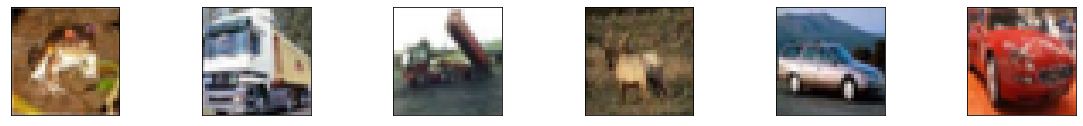

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20,2))
for i in range(6):
  figures = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
  figures.imshow(np.squeeze(X_train[i]))


In [ ]:
#rescale the images [0,255] -->[0,1]
X_train=X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
import keras
from keras.utils import np_utils
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)




In [ ]:
X_train,X_valid = X_train[5000:],X_train[:5000]
y_train,y_valid = y_train[5000:],y_train[:5000]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten,MaxPooling2D,Dense,Dropout
model =Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same' ,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same' ,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same' ,activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only=True)
history_data=model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_valid,y_valid),callbacks=[checkpointer],verbose=2,shuffle=True)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.48262, saving model to model.weights.best.hdf5
1407/1407 - 8s - loss: 1.5386 - accuracy: 0.4478 - val_loss: 1.4826 - val_accuracy: 0.4742
Epoch 2/100

Epoch 00002: val_loss improved from 1.48262 to 1.12670, saving model to model.weights.best.hdf5
1407/1407 - 7s - loss: 1.1980 - accuracy: 0.5783 - val_loss: 1.1267 - val_accuracy: 0.6060
Epoch 3/100

Epoch 00003: val_loss improved from 1.12670 to 1.00589, saving model to model.weights.best.hdf5
1407/1407 - 7s - loss: 1.0771 - accuracy: 0.6246 - val_loss: 1.0059 - val_accuracy: 0.6540
Epoch 4/100

Epoch 00004: val_loss did not improve from 1.00589
1407/1407 - 8s - loss: 1.0103 - accuracy: 0.6517 - val_loss: 1.2004 - val_accuracy: 0.5876
Epoch 5/100

Epoch 00005: val_loss did not improve from 1.00589
1407/1407 - 7s - loss: 0.9736 - accuracy: 0.6673 - val_loss: 1.0570 - val_accuracy: 0.6496
Epoch 6/100

Epoch 00006: val_loss improved from 1.00589 to 0.99167, saving model to model.wei

In [ ]:
model.load_weights('model.weights.best.hdf5')

In [ ]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test accuracy: ',score[1])

Test accuracy:  0.675599992275238


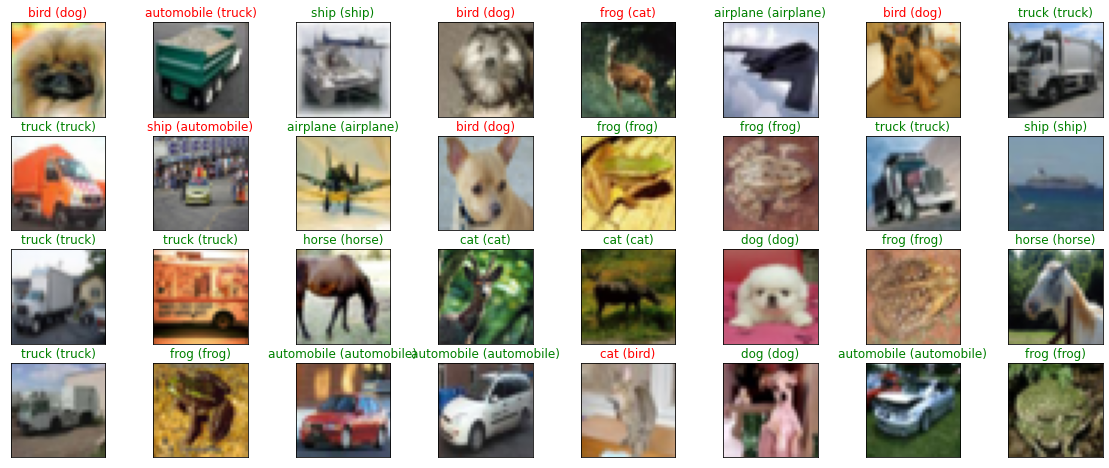

In [ ]:
#Visualize some predictions
y_hat=model.predict(X_test)
cifar10_labels = ['airplane','automobile','deer','bird','cat','dog','frog','horse','ship','truck']

#plot a random sample of test images
figures = plt.figure(figsize=(20,8))
for i,idx in enumerate(np.random.choice(X_test.shape[0],size=32,replace=False)):
  ax=figures.add_subplot(4,8,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))